# Weekly Macroeconomic Update

## Installs

In [1]:
!pip install fredapi > /dev/null

## Imports & Setup

### fredapi setup

In [1]:
import config
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import time
from datetime import datetime

#setting plot style, DataFrame max columns, and a cycling color pallete
plt.style.use('fivethirtyeight')
pd.set_option('display.max_columns', 500)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]

#from fredapi import Fred
from fred_api import FRED

fred_key = config.fred_api_key

#fred = Fred(api_key=fred_key)
fred = FRED(api_key=fred_key)

### Manual API Setup

In [154]:
base_url = 'https://api.stlouisfed.org/'

In [ ]:
## data to include
# approx yield curve: SOFR (similar to Fed Funds Rate), 3mo, 10yr, 30yr
# unemployment rate
# Job postings data
# Nonfarm payrolls
# inflation data (PCE, CPI, PPI)
# PCE series: PCEPILFE (monthly, chained), DPCCRAM1M225NBEA (monthly, MoM %), 
# recent economic indicators
# S&P 500


## Upcoming Economic Data Releases (INCOMPLETE)

In [155]:
today = datetime.today().strftime('%Y-%m-%d')

# function to get all economic data releases
def get_all_releases_json(realtime_start=today, realtime_end=today, api_key=fred_key, limit=1000, offset=0, order_by='release_id', sort_order='asc'):
    all_releases_endpoint = 'fred/releases'

    release_params = {
        'api_key': api_key,
        'file_type': 'json',
        'realtime_start': realtime_start,
        'realtime_end': realtime_end,
        'limit': limit,
        'offset': offset,
        'order_by': order_by,
        'sort_order': sort_order
    }
    
    response = requests.get(base_url + all_releases_endpoint, params=release_params)

    if response.status_code == 200:
        res_data = response.json()
        release_df = pd.DataFrame(res_data['releases'])
        return release_df
    else:
        print('Failed to retrieve data. Status Code: ', response.status_code)

# function to retreive a specific economic data release
def get_release_json(release_id, realtime_start='1776-07-04', realtime_end='9999-12-31', api_key=fred_key):
    release_endpoint = 'fred/release'

    release_params = {
        'release_id': release_id,
        'api_key': api_key,
        'file_type': 'json',
        'realtime_start': realtime_start,
        'realtime_end': realtime_end
    }
    
    response = requests.get(base_url + release_endpoint, params=release_params)

    if response.status_code == 200:
        res_data = response.json()
        release_df = pd.DataFrame(res_data['releases'])
        return release_df
    else:
        print('Failed to retrieve data. Status Code: ', response.status_code)


# function to get future release dates
def get_release_dates_json(release_id, realtime_start='1776-07-04', realtime_end='9999-12-31', limit=10000, offset=0, sort_order='asc', include_release_dates_with_no_data='false', api_key=fred_key):
    release_date_endpoint = 'fred/release/dates'

    release_params = {
        'release_id': release_id,
        'api_key': api_key,
        'file_type': 'json',
        'realtime_start': realtime_start,
        'realtime_end': realtime_end,
        'limit': limit,
        'offset': offset,
        'sort_order': sort_order,
        'include_release_dates_with_no_data': include_release_dates_with_no_data
    }
    
    response = requests.get(base_url + release_date_endpoint, params=release_params)

    if response.status_code == 200:
        res_data = response.json()
        release_df = pd.DataFrame(res_data['release_dates'])
        return release_df
    else:
        print('Failed to retrieve data. Status Code: ', response.status_code)

In [150]:
get_release_dates_json(200)

,release_id,date
0,200,2014-04-16
1,200,2014-04-17
2,200,2014-04-21
3,200,2014-04-22
4,200,2014-04-23
...,...,...
2561,200,2024-07-05
2562,200,2024-07-08
2563,200,2024-07-09
2564,200,2024-07-10


In [160]:
get_all_releases_json()

,id,realtime_start,realtime_end,name,press_release,link,notes
0,9,2024-07-14,2024-07-14,Advance Monthly Sales for Retail and Food Serv...,True,http://www.census.gov/retail/,The U.S. Census Bureau conducts the Advance Mo...
1,10,2024-07-14,2024-07-14,Consumer Price Index,True,http://www.bls.gov/cpi/,NaN
2,11,2024-07-14,2024-07-14,Employment Cost Index,True,http://www.bls.gov/ncs/ect,NaN
3,13,2024-07-14,2024-07-14,G.17 Industrial Production and Capacity Utiliz...,True,http://www.federalreserve.gov/releases/g17/,"For questions on the data, please contact the ..."
4,14,2024-07-14,2024-07-14,G.19 Consumer Credit,True,http://www.federalreserve.gov/releases/g19/,"For questions on the data, please contact the ..."
...,...,...,...,...,...,...,...
309,605,2024-07-14,2024-07-14,Underlying Inflation Gauge (UIG),True,https://www.newyorkfed.org/research/policy/und...,The Underlying Inflation Gauge is a monthly es...
310,637,2024-07-14,2024-07-14,Wage Growth Tracker,True,https://www.atlantafed.org/chcs/wage-growth-tr...,The Atlanta Fed&#39;s Wage Growth Tracker is a...
311,670,2024-07-14,2024-07-14,Macroeconomic Uncertainty Index for United States,True,https://www.sydneyludvigson.com/macro-and-fina...,NaN
312,705,2024-07-14,2024-07-14,Financial and Real Uncertainty Indexes,True,https://www.sydneyludvigson.com/macro-and-fina...,NaN


In [161]:
#function
def get_release_calendar_json(realtime_start=today, realtime_end=today, api_key=fred_key):
    release_endpoint = 'fred/releases/calendar'

    release_params = {
        'api_key': api_key,
        'file_type': 'json',
        'realtime_start': realtime_start,
        'realtime_end': realtime_end
    }
    
    response = requests.get(base_url + release_endpoint, params=release_params)

    if response.status_code == 200:
        res_data = response.json()
        release_df = pd.DataFrame(res_data)
        return release_df
    else:
        print('Failed to retrieve data. Status Code: ', response.status_code)

In [162]:
get_release_calendar_json()

Failed to retrieve data. Status Code:  404


## Yield Curve

In [17]:
#fred.search('3 Treasury Yield', filter=('frequency', 'Daily'))

<Axes: title={'center': 'SOFR'}>

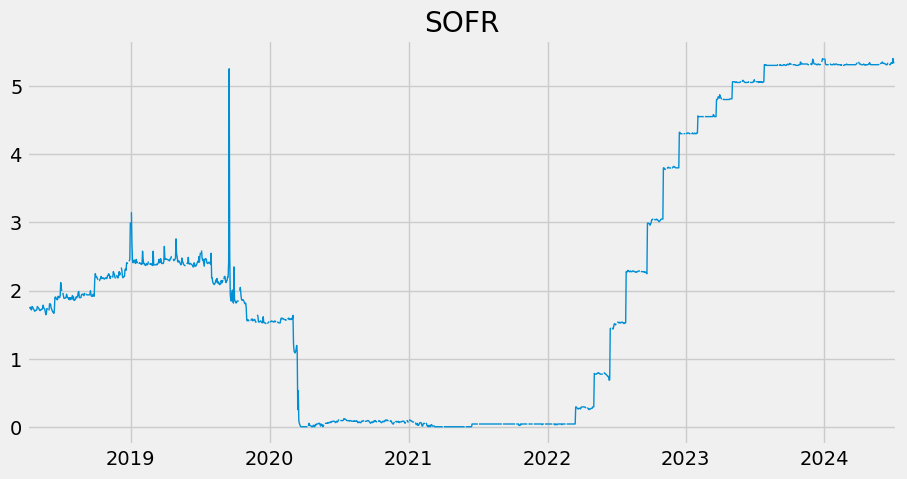

In [165]:
thirty = fred.get_series(series_id='DGS30')
#thirty.plot(figsize=(10,5), title='30yr Treasury Yield', lw=1)

ten = fred.get_series(series_id='DGS10')
#ten.plot(figsize=(10,5), title='10yr Treasury Yield', lw=1)

three_mo = fred.get_series(series_id='DGS3MO')
#three_mo.plot(figsize=(10,5), title='3mo Treasury Yield', lw=1)

sofr = fred.get_series(series_id='SOFR')
sofr.plot(figsize=(10,5), title='SOFR', lw=1)

In [166]:
yield_curve = pd.concat([thirty, ten, three_mo, sofr], axis=1)
yield_curve

,0,1,2,3
1962-01-02,NaN,4.06,NaN,NaN
1962-01-03,NaN,4.03,NaN,NaN
1962-01-04,NaN,3.99,NaN,NaN
1962-01-05,NaN,4.02,NaN,NaN
1962-01-08,NaN,4.03,NaN,NaN
...,...,...,...,...
2024-07-05,4.47,4.28,5.46,5.32
2024-07-08,4.46,4.28,5.46,5.32
2024-07-09,4.49,4.30,5.46,5.34
2024-07-10,4.47,4.28,5.46,5.34


## Inflation

### PCE

In [51]:
# PCE
core_pce = fred.get_series('PCEPILFE')
latest_release = str(core_pce.index[-1].date())
prev_release = str(core_pce.index[-13].date())
print(latest_release)
print(prev_release)

2024-05-01
2023-05-01


In [103]:
mom_core_pce = {}
yoy_core_pce = {}
for i in range(96):
    yoy_core_pce[core_pce.index[-(1+i)].date().strftime("%b %y")] = ((core_pce.iloc[-(1+i)] / core_pce.iloc[-(13+i)]) - 1)*100
    mom_core_pce[core_pce.index[-(1+i)].date().strftime("%b %y")] = ((core_pce.iloc[-(1+i)] / core_pce.iloc[-(2+i)]) - 1)*100

mom_core_pce = dict(reversed(mom_core_pce.items()))
yoy_core_pce = dict(reversed(yoy_core_pce.items()))

mom_core_pce_df = pd.DataFrame.from_dict(mom_core_pce, orient = 'index', columns = ['MoM'])
yoy_core_pce_df = pd.DataFrame.from_dict(yoy_core_pce, orient = 'index', columns = ['YoY'])

[Text(0, 0, 'Jun 20'),
 Text(1, 0, 'Jul 20'),
 Text(2, 0, 'Aug 20'),
 Text(3, 0, 'Sep 20'),
 Text(4, 0, 'Oct 20'),
 Text(5, 0, 'Nov 20'),
 Text(6, 0, 'Dec 20'),
 Text(7, 0, 'Jan 21'),
 Text(8, 0, 'Feb 21'),
 Text(9, 0, 'Mar 21'),
 Text(10, 0, 'Apr 21'),
 Text(11, 0, 'May 21'),
 Text(12, 0, 'Jun 21'),
 Text(13, 0, 'Jul 21'),
 Text(14, 0, 'Aug 21'),
 Text(15, 0, 'Sep 21'),
 Text(16, 0, 'Oct 21'),
 Text(17, 0, 'Nov 21'),
 Text(18, 0, 'Dec 21'),
 Text(19, 0, 'Jan 22'),
 Text(20, 0, 'Feb 22'),
 Text(21, 0, 'Mar 22'),
 Text(22, 0, 'Apr 22'),
 Text(23, 0, 'May 22'),
 Text(24, 0, 'Jun 22'),
 Text(25, 0, 'Jul 22'),
 Text(26, 0, 'Aug 22'),
 Text(27, 0, 'Sep 22'),
 Text(28, 0, 'Oct 22'),
 Text(29, 0, 'Nov 22'),
 Text(30, 0, 'Dec 22'),
 Text(31, 0, 'Jan 23'),
 Text(32, 0, 'Feb 23'),
 Text(33, 0, 'Mar 23'),
 Text(34, 0, 'Apr 23'),
 Text(35, 0, 'May 23'),
 Text(36, 0, 'Jun 23'),
 Text(37, 0, 'Jul 23'),
 Text(38, 0, 'Aug 23'),
 Text(39, 0, 'Sep 23'),
 Text(40, 0, 'Oct 23'),
 Text(41, 0, 'Nov 23'),
 T

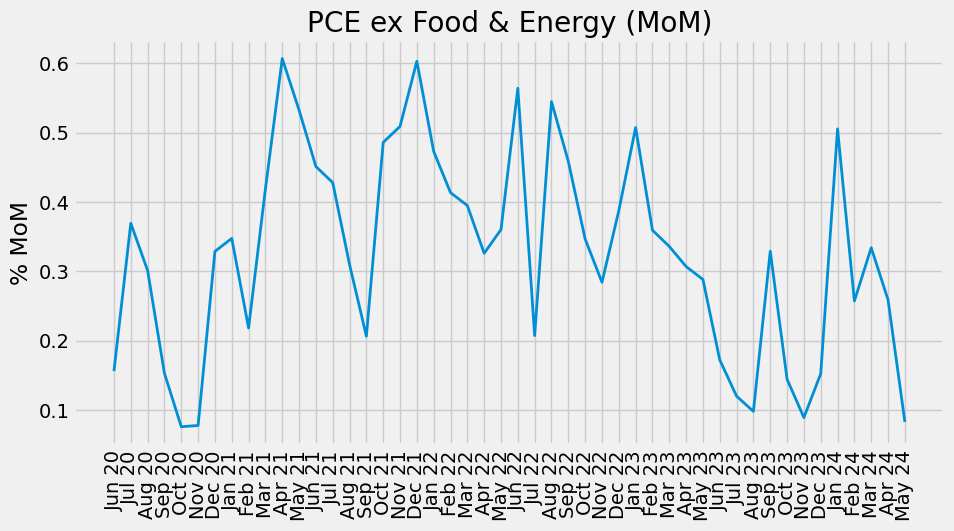

In [93]:
ax = mom_core_pce_df.plot(figsize=(10,5), title='PCE ex Food & Energy (MoM)', lw=2, legend=False, ylabel='% MoM')
ax.set_xticks(range(len(mom_core_pce_df)))
ax.set_xticklabels([item for item in mom_core_pce_df.index.tolist()], rotation=90)

[Text(0, 0, 'Jun 20'),
 Text(1, 0, 'Jul 20'),
 Text(2, 0, 'Aug 20'),
 Text(3, 0, 'Sep 20'),
 Text(4, 0, 'Oct 20'),
 Text(5, 0, 'Nov 20'),
 Text(6, 0, 'Dec 20'),
 Text(7, 0, 'Jan 21'),
 Text(8, 0, 'Feb 21'),
 Text(9, 0, 'Mar 21'),
 Text(10, 0, 'Apr 21'),
 Text(11, 0, 'May 21'),
 Text(12, 0, 'Jun 21'),
 Text(13, 0, 'Jul 21'),
 Text(14, 0, 'Aug 21'),
 Text(15, 0, 'Sep 21'),
 Text(16, 0, 'Oct 21'),
 Text(17, 0, 'Nov 21'),
 Text(18, 0, 'Dec 21'),
 Text(19, 0, 'Jan 22'),
 Text(20, 0, 'Feb 22'),
 Text(21, 0, 'Mar 22'),
 Text(22, 0, 'Apr 22'),
 Text(23, 0, 'May 22'),
 Text(24, 0, 'Jun 22'),
 Text(25, 0, 'Jul 22'),
 Text(26, 0, 'Aug 22'),
 Text(27, 0, 'Sep 22'),
 Text(28, 0, 'Oct 22'),
 Text(29, 0, 'Nov 22'),
 Text(30, 0, 'Dec 22'),
 Text(31, 0, 'Jan 23'),
 Text(32, 0, 'Feb 23'),
 Text(33, 0, 'Mar 23'),
 Text(34, 0, 'Apr 23'),
 Text(35, 0, 'May 23'),
 Text(36, 0, 'Jun 23'),
 Text(37, 0, 'Jul 23'),
 Text(38, 0, 'Aug 23'),
 Text(39, 0, 'Sep 23'),
 Text(40, 0, 'Oct 23'),
 Text(41, 0, 'Nov 23'),
 T

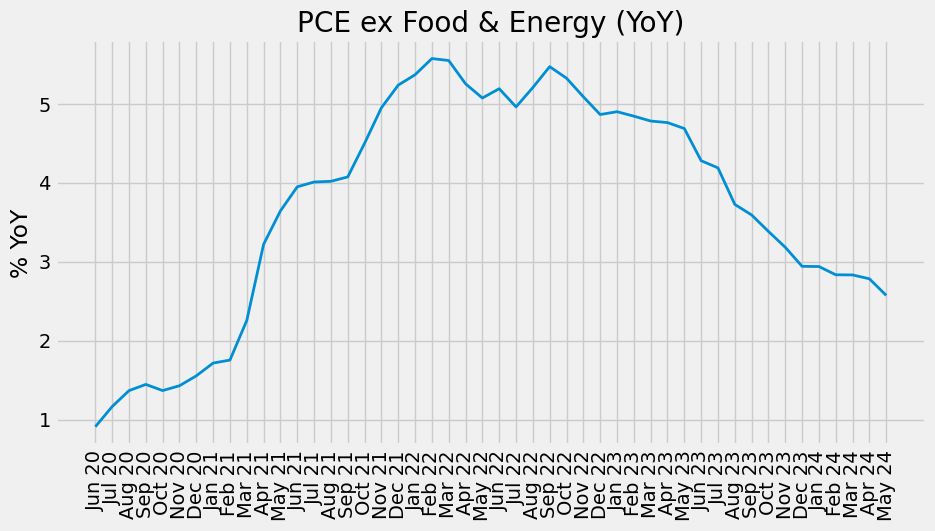

In [92]:
ax = yoy_core_pce_df.plot(figsize=(10,5), title='PCE ex Food & Energy (YoY)', lw=2, legend=False, ylabel='% YoY')
ax.set_xticks(range(len(yoy_core_pce_df)))
ax.set_xticklabels([item for item in yoy_core_pce_df.index.tolist()], rotation=90)

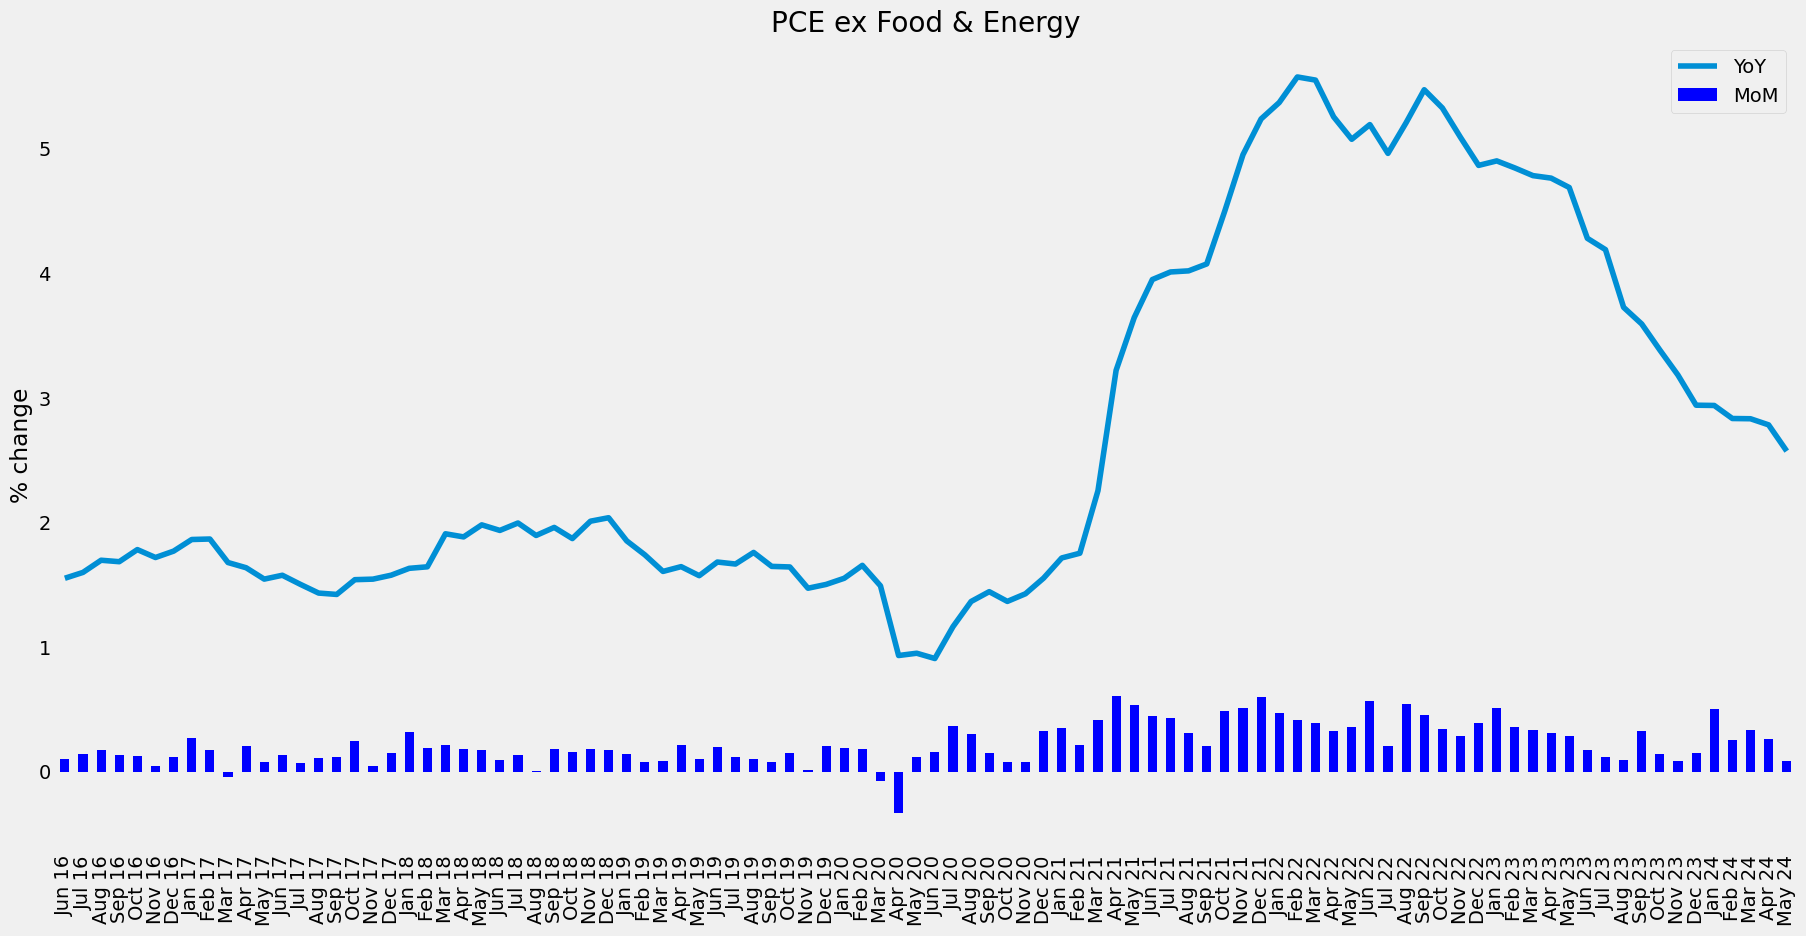

In [116]:
combined_pce_df = pd.concat([mom_core_pce_df, yoy_core_pce_df], axis=1)
combined_pce_df
combined_pce_df['MoM'].plot(kind='bar', figsize=(20,10), title='PCE ex Food & Energy', lw=1, colormap='winter', ylabel='% change')
ax = combined_pce_df['YoY'].plot(kind='line')
ax.set_xticks(range(len(combined_pce_df)))
ax.set_xticklabels([item for item in combined_pce_df.index.tolist()], rotation=90)
ax.grid(visible=False, axis='both')
ax.legend()

### CPI

In [ ]:
sticky_core_cpi_yoy = fred.get_series('CORESTICKM159SFRBATL')
sticky_core_cpi_mom = fred.get_series('CORESTICKM157SFRBATL')


## Jobless Claims

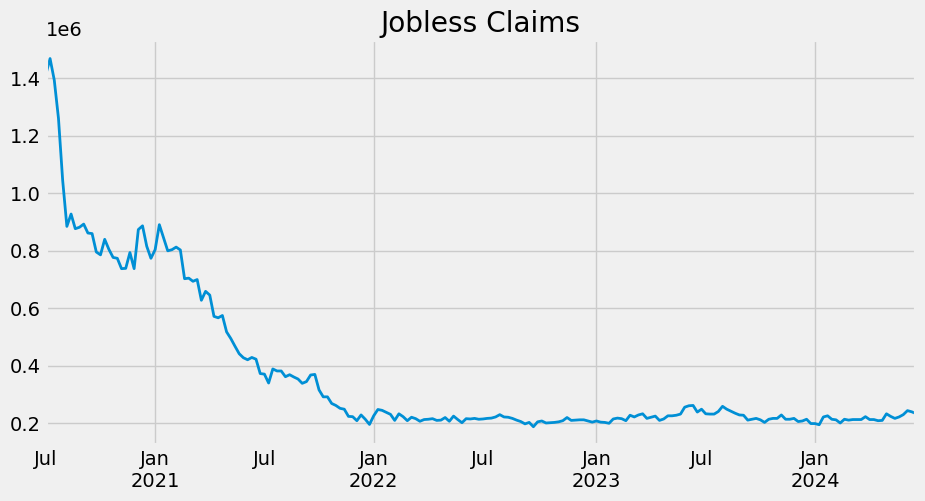

In [126]:
# Initial Jobless Claims: Filed when someone first files for unemployment
claims = fred.get_series('ICSA')
claims_48 = claims.iloc[-208:]

ax = claims_48.plot(figsize=(10,5), title='Jobless Claims', lw=2)
#ax.set_xticks(range(len(claims_48)))
#ax.set_xticklabels([item for item in claims_48.index.tolist()], rotation=90)

<Axes: >

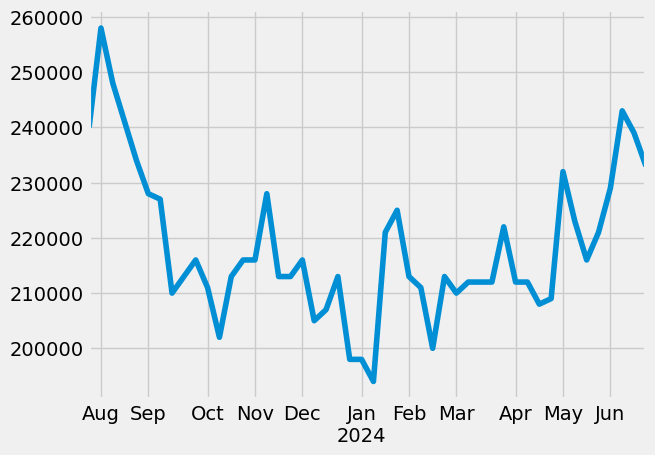

In [124]:
claims_48.plot()

## Economic Data Release Dates

In [18]:
#fred.search('PCE')